In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Data cleaning and preprocessing

In [3]:
df=pd.read_csv("/content/Daily Household Transactions (1).csv")
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [4]:
df.head(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
df.tail(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [6]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [8]:
df['Subcategory'].fillna('Unknown', inplace=True)
df['Note'].fillna('Unknown', inplace=True)
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [9]:
df.drop_duplicates()
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,Unknown,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,Unknown,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,Unknown,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,Unknown,tea,10.0,Expense,INR


#EDA

In [10]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     2461 non-null   object 
 4   Note            2461 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


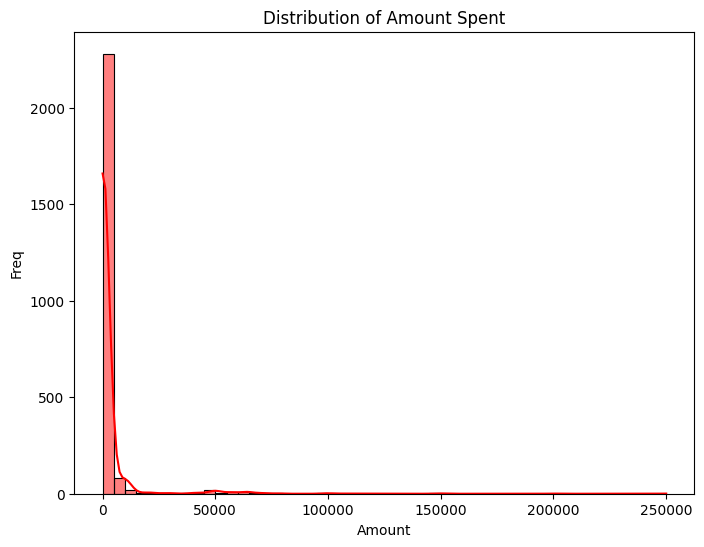

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=50, kde=True,color='red')
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount')
plt.ylabel('Freq')
plt.show()

<ipython-input-38-2741cea83d91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=catgry_count.index, y=catgry_count.values,palette='bright')


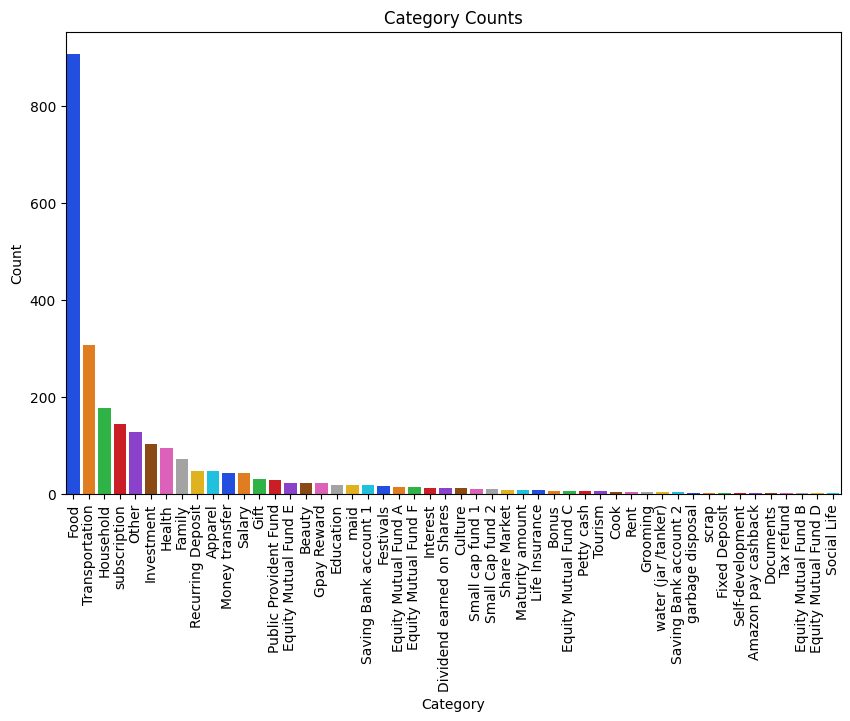

In [38]:
catgry_count= df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=catgry_count.index, y=catgry_count.values,palette='bright')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

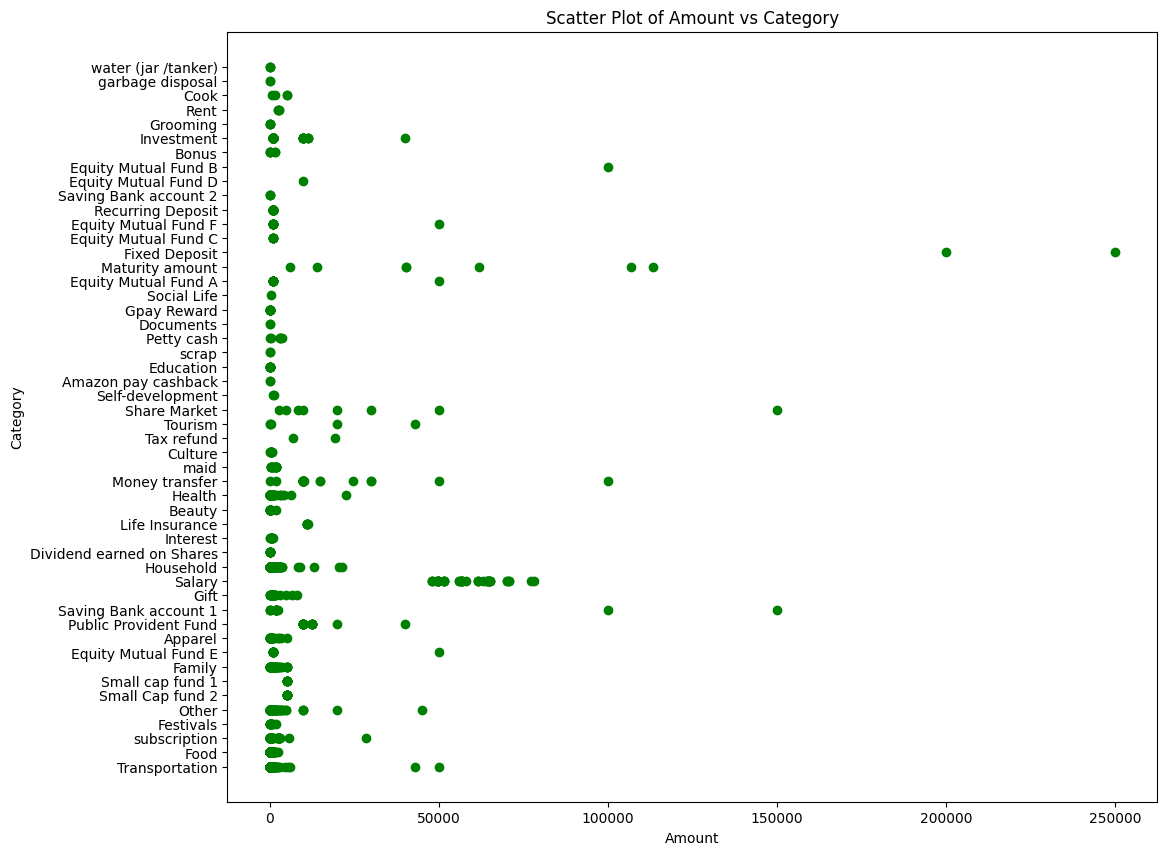

In [43]:
plt.figure(figsize=(12, 10))
plt.scatter(df['Amount'], df['Category'],color='green')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Scatter Plot of Amount vs Category')
plt.show()

<ipython-input-37-23237e6a6556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=currncy_counts.index, y=currncy_counts.values, palette='bright')


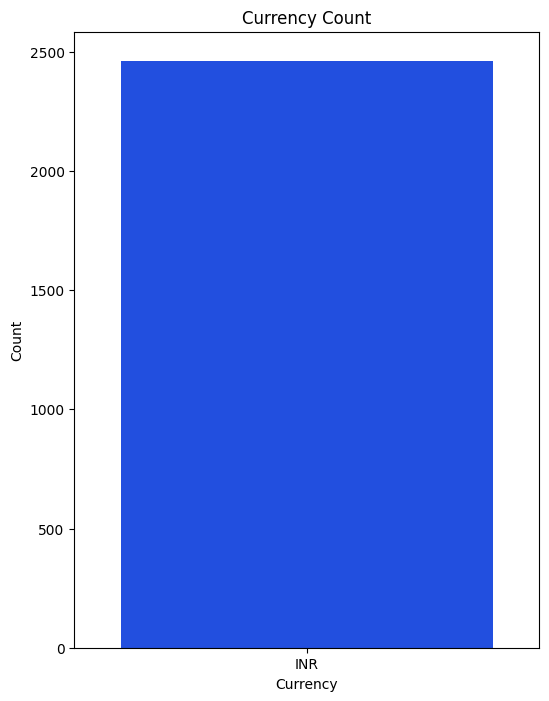

In [37]:
currncy_counts = df['Currency'].value_counts()
plt.figure(figsize=(6, 8))
sns.barplot(x=currncy_counts.index, y=currncy_counts.values, palette='bright')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Currency Count')
plt.show()

#KMeans clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

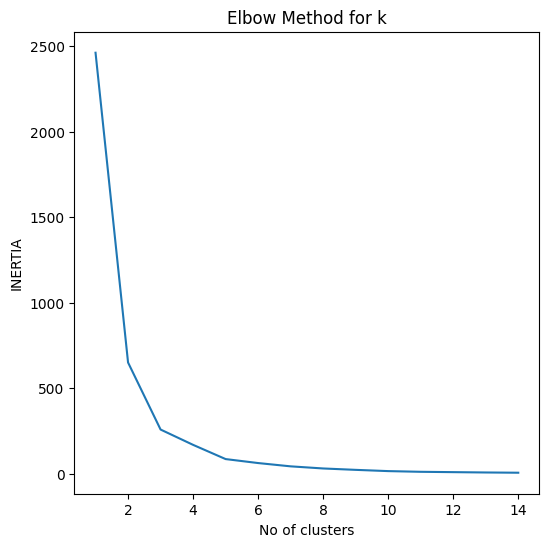

In [32]:
scaler = StandardScaler()
df['normalized'] = scaler.fit_transform(df[['Amount']])
Inertia = []
i = range(1, 15)
for a in i:
    kmean = KMeans(n_clusters=a, random_state=0)
    kmean.fit(df[['normalized']])
    Inertia.append(kmean.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(i, Inertia)
plt.xlabel('No of clusters')
plt.ylabel('INERTIA')
plt.title('Elbow Method for k')
plt.show()



In [33]:
kmean = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmean.fit_predict(df[['normalized']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#visualization

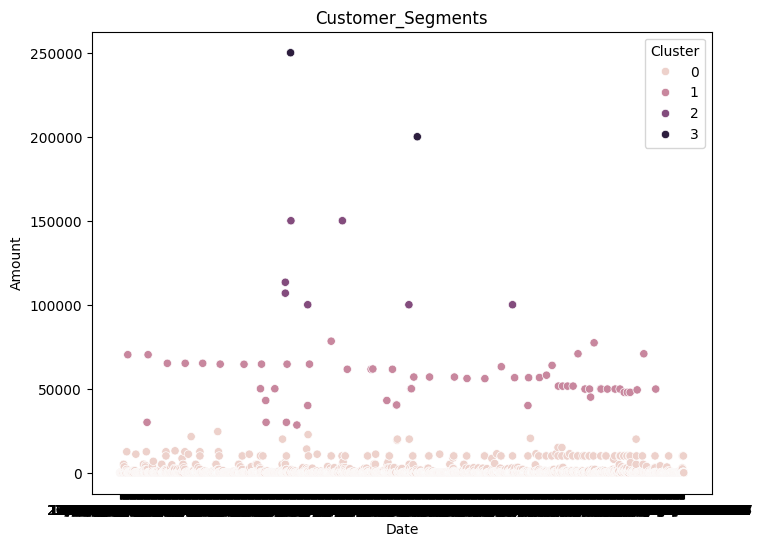

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Date', y='Amount', hue='Cluster', data=df)
plt.title('Customer_Segments')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


Text(0.5, 1.0, 'Distribution of the Expenses')

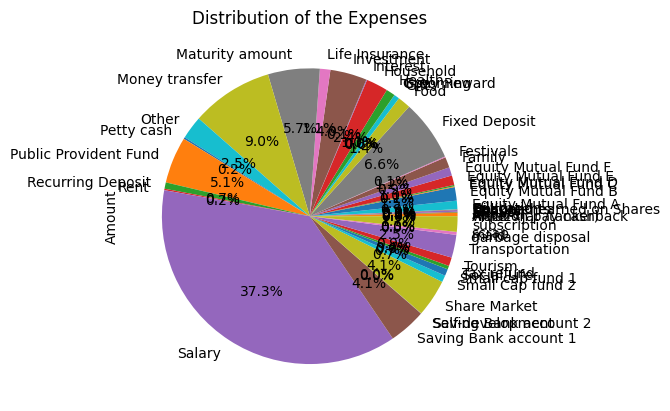

In [36]:
df.groupby('Category')['Amount'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of the Expenses")